# **Scikit-Learn**
### Machine Learning Library for Python
- Simple and easy to use for beginners.
- Clear and consistent API with extensive documentation and resources.
- Wide range of in-built tools and algorithms for various machine learning tasks.
<hr>

Importing Dependencies

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
from sklearn import datasets
from sklearn.datasets import make_blobs

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

# Classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Clustering
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

# Evaluation
from sklearn.metrics import confusion_matrix

Loading Data : Getting data from external sources and assigning to accessible variables and format

In [3]:
iris = datasets.load_iris()
x, y = iris.data, iris.target

irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print("Dataset Information : ")
print("   Feature Names : ", iris.feature_names)
print("   Target Names : ", iris.target_names)
print("   Dataset Size : ", irisDF.shape)

Dataset Information : 
   Feature Names :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
   Target Names :  ['setosa' 'versicolor' 'virginica']
   Dataset Size :  (150, 4)


Data Preprocessing : Handling missing values, Detecting/Removing duplicates and Identifying/Dealing with Outliers

In [5]:
irisDF.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
print("Checking for missing values : ")
print(irisDF.isnull().sum())

Checking for missing values : 
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [7]:
print("Checking for duplicate values : ")
print(irisDF[irisDF.duplicated()])

irisDF.drop_duplicates(inplace=True)

Checking for duplicate values : 
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
142                5.8               2.7                5.1               1.9


In [8]:
print("Standardising data, ie, mean = 0 and variance = 1, so that certain features dominate others")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

df_scaled = pd.DataFrame(data=X_scaled, columns=iris.feature_names)
print(df_scaled.head())

Standardising data, ie, mean = 0 and variance = 1, so that certain features dominate others
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


In [9]:
print("Feature Selection : Shortlisting features that are important for the model\n")

selector = SelectKBest(score_func=f_classif, k=2)                       # Selecting k=2 best features
X_selected = selector.fit_transform(df_scaled, y)

selected_indices = selector.get_support(indices=True)
selected_features = df_scaled.columns[selected_indices]

print("Selected Features:")
for i, feature in enumerate(selected_features):
    print(f"{i+1}. {feature}")

    print(f"Shape of X_selected: {X_selected.shape}\n")

Feature Selection : Shortlisting features that are important for the model

Selected Features:
1. petal length (cm)
Shape of X_selected: (150, 2)

2. petal width (cm)
Shape of X_selected: (150, 2)



Model Selection : Applying our data to various algorithm, to obtain the best model

In [10]:
# Support Vector Machine (Classification)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

clf = SVC(kernel='rbf', random_state=37)                                        # Initialize SVM classifier
clf.fit(X_train, y_train)                                                       # Train the classifier

print("Classification Report : ")

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Accuracy: 1.00


In [11]:
# Linear Regression (Regression)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=37)

regressor = LinearRegression()                                                  # Initialize Linear Regression model
regressor.fit(X_train, y_train)                                                 # Train the model

y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error :", mse)                                              # Lower the value, better the model

r2 = r2_score(y_test, y_pred)
print("R-squared :", r2)                                                        # Closer to 1, better the model

Mean Squared Error : 0.04635714443993607
R-squared : 0.9352151708137539


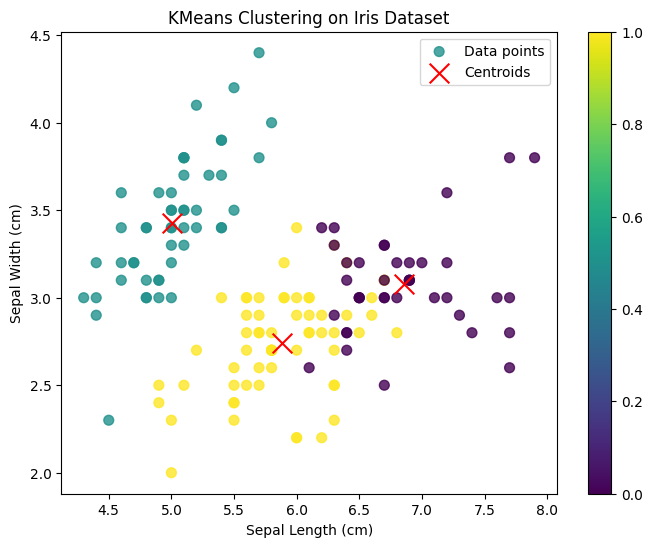

In [12]:
# Clustering (KMeans)
kmeans = KMeans(n_clusters=3, random_state=42)                                # Initialize KMeans model with 3 clusters
kmeans.fit(x)                                                                 # Train the model
cluster_labels = kmeans.labels_

plt.figure(figsize=(8, 6))

plt.scatter(x[:, 0], x[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8, label='Data points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, c='red', label='Centroids')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KMeans Clustering on Iris Dataset')
plt.legend()
plt.colorbar()
plt.show()

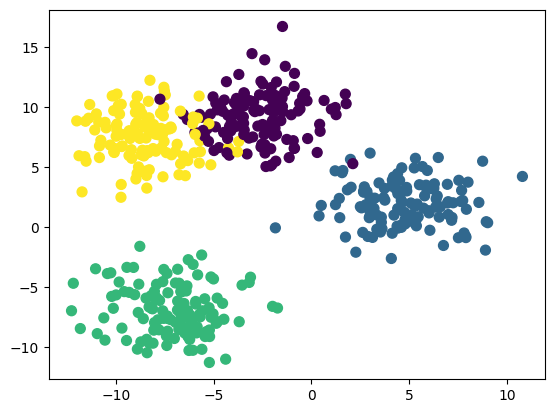

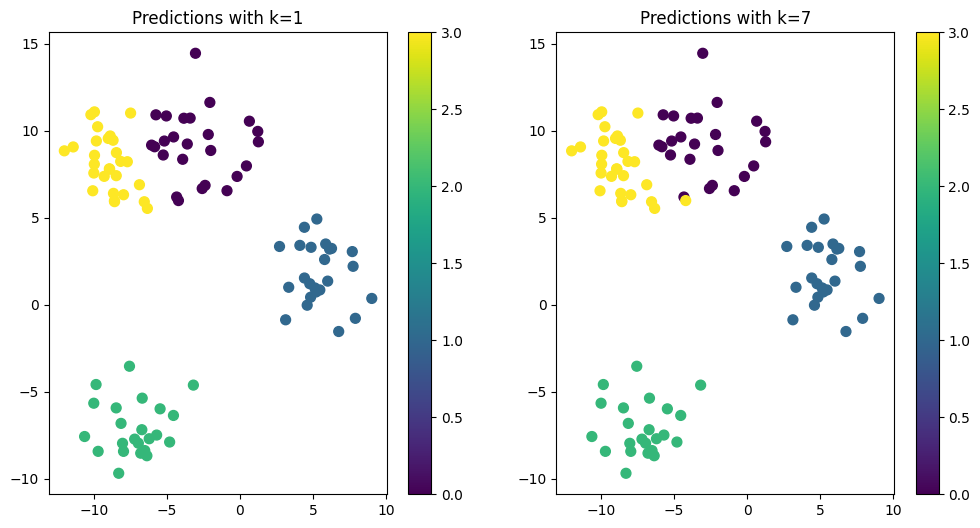

In [37]:
# K-Nearest Neighbors (Clustering)
x, y = make_blobs(n_samples=500, centers=4, n_features=2, random_state=42, cluster_std=2)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

knn1 = KNeighborsClassifier(n_neighbors=4)
knn1.fit(X_train, y_train)
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train, y_train)

y_pred1 = knn1.predict(X_test)
y_pred7 = knn7.predict(X_test)

# plot ypred vs ytest
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred1, s=50, cmap='viridis')
plt.title('Predictions with k=1')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred7, s=50, cmap='viridis')
plt.title('Predictions with k=7')
plt.colorbar()

plt.show()


Evaluation : Calculating and Analysing our model's performance

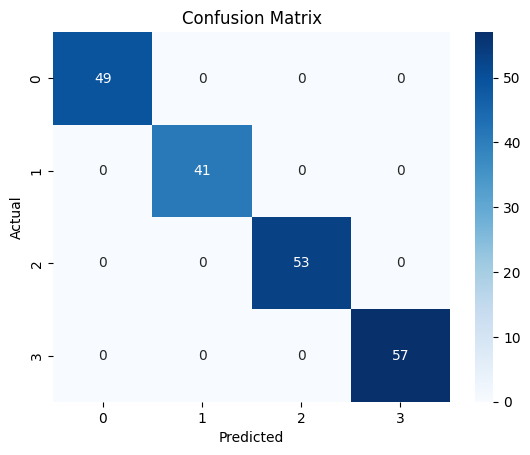

In [14]:
# Confusion Matrix
model = RandomForestClassifier(n_estimators=100, random_state=37)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Below is rough. 

Explained Variance Ratio: [0.72962445 0.22850762]


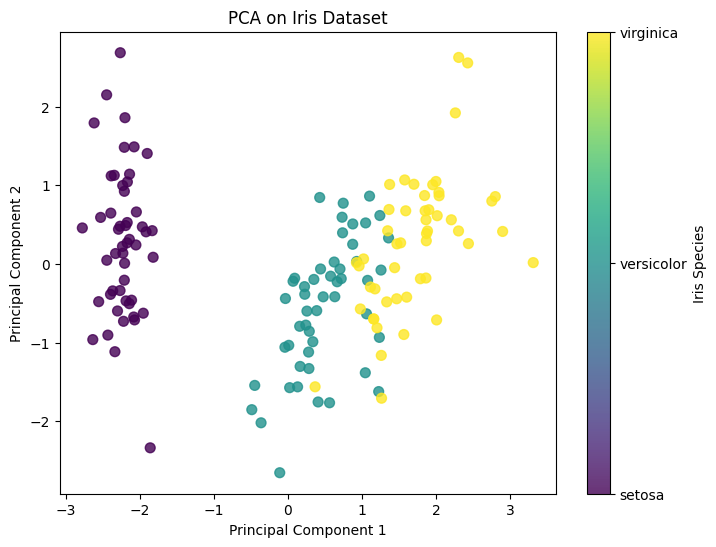

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, cmap='viridis', s=50, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.colorbar(label='Iris Species', ticks=[0, 1, 2], format=plt.FuncFormatter(lambda val, loc: iris.target_names[val]))
plt.show()

In [16]:
from sklearn.svm import OneClassSVM

# One-Class SVM model
clf = OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)
clf.fit(X_scaled[y == 1])                                                           # Fit the model on a single normal class data

y_pred = clf.predict(X_scaled)

print("Predictions (1 = Normal/Inliers, -1 = Anomaly/Outliers) :")
print(y_pred)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 150 but corresponding boolean dimension is 1000

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Example of classification evaluation
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))

# Example of regression evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Example of cross-validation and grid search
cross_val_scores = cross_val_score(model, x, y, cv=5)
print("Cross-Validation Scores:", cross_val_scores)

param_grid = {'C': [0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
MAE: 0.0
MSE: 0.0
R² Score: 1.0
Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Best Parameters: {'C': 1}


c:\Users\AviLOL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\AviLOL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/